In [24]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import os 
import pandas as pd
import pdb
#Define Computer
Malphigui=0
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (10,10),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large', 
         'font.size': 20,
         'lines.linewidth': 4}
pylab.rcParams.update(params)

if Malphigui:
    directory='/home/pdavid/Bureau/Hybrid_2D_beta/Code' #Malpighi
    directory_script='/home/pdavid/Bureau/Hybrid_2D_beta/Figures_and_Tests/Multiple_sources'
    csv_directory='/home/pdavid/Bureau/Hybrid_2D_beta/Figures_and_Tests/Multiple_sources/csv_outputs'
    directory_article_figures='/home/pdavid/Bureau/Hybrid_2D_beta/Figures_and_Tests/Article_figs'
else: #Auto_58
    directory='/home/pdavid/Bureau/Code/Hybrid_2D_beta/Code/'
    os.chdir(directory)
    directory_script='/home/pdavid/Bureau/Code/Hybrid_2D_beta/Figures_and_Tests/Multiple_sources'
    csv_directory='/home/pdavid/Bureau/Code/Hybrid_2D_beta/Figures_and_Tests/Multiple_sources/csv_outputs'
    directory_article_figures='/home/pdavid/Bureau/Code/Hybrid_2D_beta/Figures_and_Tests/Article_figs'
os.chdir(directory)

from Testing import extract_COMSOL_data, save_csv
from Small_functions import get_MRE

COMSOL_lin_dir=directory_script + '/COMSOL_output/linear'
COMSOL_metab_dir=directory_script + '/COMSOL_output/linear'

In [25]:
range_cells=np.squeeze(np.array(pd.read_csv(csv_directory + '/range_cells.csv')))
print('range_cells={}'.format(range_cells))
alpha=50
h=alpha/range_cells
print(h)

range_cells=[ 4  8 12 16 22]
[12.5         6.25        4.16666667  3.125       2.27272727]


In [26]:
a=extract_COMSOL_data(COMSOL_lin_dir, [1,1,0])

In [27]:
q_FEM_linear,FEM_phi_linear,FEM_x_linear,FEM_y_linear=extract_COMSOL_data(COMSOL_lin_dir, [1,1,0])
q_FEM_metab,FEM_phi_metab,FEM_x_metab,FEM_y_metab=extract_COMSOL_data(COMSOL_metab_dir, [1,1,0])


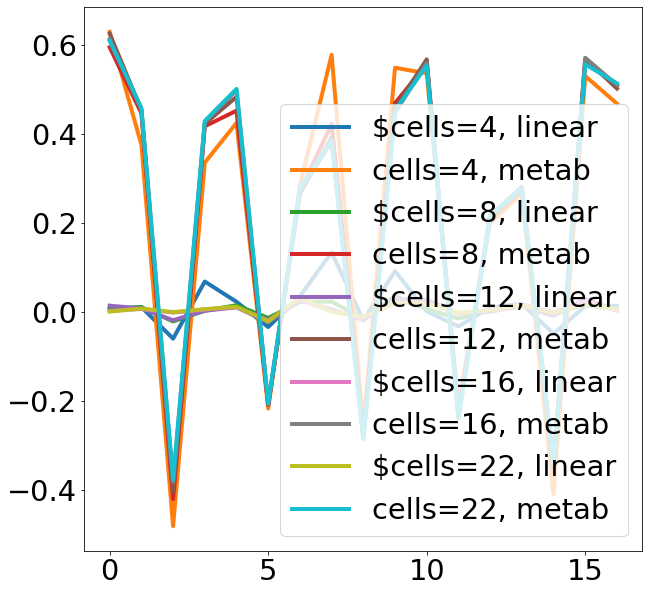

In [28]:
import pdb
for cells in range_cells:
    Multi_linear_dir=csv_directory + '/linear/cells={}'.format(int(cells))
    Multi_metab_dir=csv_directory + '/metab/cells={}'.format(int(cells)) 
    
    phi_Multi_cart_linear=pd.read_csv(Multi_linear_dir + '/phi_Multi_cart_fine_linear.csv').to_numpy()
    phi_Multi_FEM_linear=pd.read_csv(Multi_linear_dir + '/phi_Multi_FEM_linear.csv').to_numpy()
    
    phi_Multi_cart_metab=pd.read_csv(Multi_metab_dir + '/phi_Multi_cart_fine_metab.csv').to_numpy()
    phi_Multi_FEM_metab=pd.read_csv(Multi_metab_dir + '/phi_Multi_FEM_metab.csv').to_numpy()
    
    q_Multi_linear=np.squeeze(pd.read_csv(Multi_linear_dir + '/q_Multi_linear.csv').to_numpy())
    q_Multi_metab=np.squeeze(pd.read_csv(Multi_metab_dir + '/q_Multi_metab.csv').to_numpy())
    
    plt.plot( np.abs(q_FEM_linear-q_Multi_linear)/q_FEM_linear, label='$cells={}, linear'.format(int(cells)))
    plt.plot(np.abs(q_FEM_metab-q_Multi_metab)/q_FEM_metab, label='cells={}, metab'.format(int(cells)))
    
    plt.legend()

    
    
    
    

In [29]:
pd.read_csv(csv_directory + '/err_FV_q_metab.csv').to_numpy()

array([[0.64079275],
       [0.21385733],
       [0.19107744],
       [0.12762848],
       [0.07843442]])

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


FileNotFoundError: [Errno 2] No such file or directory: '/home/pdavid/Bureau/Code/Hybrid_2D_beta/Figures_and_Tests/Article_figs/Multiple_source/errs.eps'

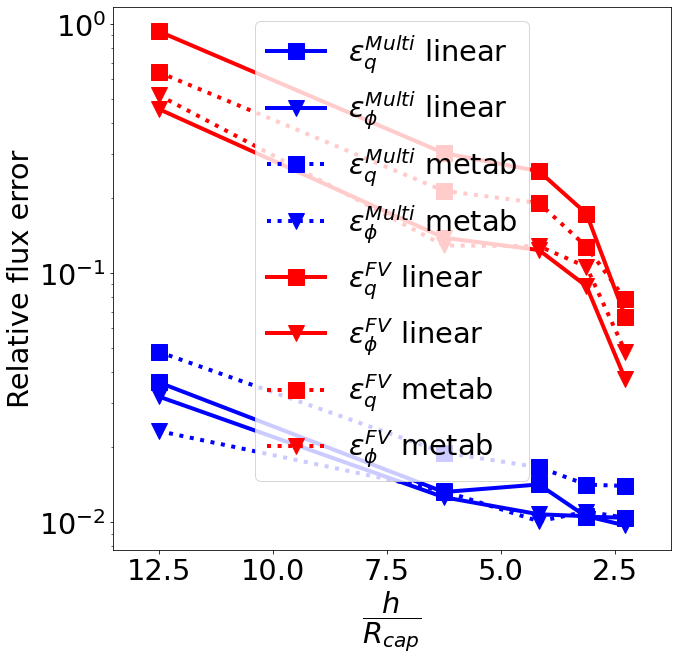

In [30]:
plt.plot(h,pd.read_csv(csv_directory + '/err_q_linear.csv').to_numpy(), '-s',color='b', markersize=16,label='$\\varepsilon_q^{Multi}$ linear')
plt.plot(h,pd.read_csv(csv_directory + '/err_phi_linear.csv').to_numpy(), '-v',color='b', markersize=16,label='$\\varepsilon_{\phi}^{Multi}$ linear')
plt.plot(h,pd.read_csv(csv_directory + '/err_q_metab.csv').to_numpy(), ':s',color='b', markersize=16,label='$\\varepsilon_q^{Multi}$ metab')
plt.plot(h,pd.read_csv(csv_directory + '/err_phi_metab.csv').to_numpy(), ':v',color='b', markersize=16,label='$\\varepsilon_{\phi}^{Multi}$ metab')

plt.plot(h,pd.read_csv(csv_directory + '/err_FV_q_linear.csv').to_numpy(), '-s',color='r', markersize=16,label='$\\varepsilon_q^{FV}$ linear')
plt.plot(h,pd.read_csv(csv_directory + '/err_FV_phi_linear.csv').to_numpy(), '-v', color='r',markersize=16,label='$\\varepsilon_{\phi}^{FV}$ linear')

plt.plot(h,pd.read_csv(csv_directory + '/err_FV_q_metab.csv').to_numpy(), ':s',color='r', markersize=16,label='$\\varepsilon_q^{FV}$ metab')
plt.plot(h,pd.read_csv(csv_directory + '/err_FV_phi_metab.csv').to_numpy(), ':v', color='r',markersize=16,label='$\\varepsilon_{\phi}^{FV}$ metab')

plt.legend()
plt.xlabel('$\dfrac{h}{R_{cap}}$')
plt.yscale('log')
plt.ylabel('Relative flux error')
plt.xlim(max(h)+1, min(h)-1)
plt.savefig(directory_article_figures + '/Multiple_source/errs.eps',bbox_inches='tight')

In [ ]:
name_array=['/err_q_linear.csv','/err_phi_linear.csv','/err_q_metab.csv','/err_phi_metab.csv']

for i in name_array:
    a=pd.read_csv(csv_directory + i)
    a['h']=h
    a.to_csv(directory_script + '/Figure_latex' + i, sep=',', index=None)

In [ ]:
cells=range_cells[0]
Multi_linear_dir=csv_directory + '/linear/cells={}'.format(int(cells))
Multi_metab_dir=csv_directory + '/metab/cells={}'.format(int(cells)) 

phi_Multi_cart_linear=pd.read_csv(Multi_linear_dir + '/phi_Multi_cart_fine_linear.csv')
phi_Multi_FEM_linear=pd.read_csv(Multi_linear_dir + '/phi_Multi_FEM_linear.csv')

phi_Multi_cart_metab=pd.read_csv(Multi_metab_dir + '/phi_Multi_cart_fine_metab.csv')
phi_Multi_FEM_metab=pd.read_csv(Multi_metab_dir + '/phi_Multi_FEM_metab.csv')

q_Multi_linear=pd.read_csv(Multi_linear_dir + '/q_Multi_linear.csv')
q_Multi_metab=pd.read_csv(Multi_metab_dir + '/q_Multi_metab.csv')
